# PPplot

The notebook is using PPviz in order to plot the different graphs.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
import json
import glob
import shutil
import os
opj = os.path.join

from PPviz import *


In [ ]:
#Attempt to visualize the ASC questions
essai = '../Experiment/data/ASC_questions.npy'
data = np.load(essai)
#data = data[0:10]
print(data.shape)
print(data)

In [ ]:
# Load JSON data from the file
with open("ASC.json", "r") as json_file:
    data = json.load(json_file)

# List elements with "cat_5D" equal to "OBN" or sm else using list comprehension
obn_elements = [element for element in data if element["cat_11D"] == ""]

# Print the filtered elements
for element in obn_elements:
    print("ID:", element["ID"])
    print("Phrase:", element["phrase"])
    print("cat_5D:", element["cat_5D"])
    print("cat_11D:", element["cat_11D"])
    print("------------------------")

print("Total number of elements:", len(obn_elements))

In [ ]:

# Create a dictionary to store elements for each "cat_11D" category
cat_11D_dict = {}

# Group elements by "cat_11D" category
for element in data:
    cat_11D = element["cat_11D"]
    if cat_11D not in cat_11D_dict:
        cat_11D_dict[cat_11D] = []
    cat_11D_dict[cat_11D].append(element["ID"])

# Define the mapping of "cat_11D" categories to their labels
cat_11D_labels = {
    "EU": "Questions",
    "SE": "Questions",
    "BS": "Questions",
    "IS": "Questions",
    "DE": "Questions",
    "ICC": "Questions",
    "ANX": "Questions",
    "CI": "Questions",
    "EI": "Questions",
    "AVS": "Questions",
    "CMP": "Questions"
}

# Print the results
for cat_11D, ids in cat_11D_dict.items():
    label = cat_11D_labels.get(cat_11D, "Unknown")
    ids_text = ", ".join(str(id) for id in ids)
    print(f"{label} {cat_11D}: {ids_text}.")


Analysing the ASC results

In [25]:
# Load the participants' answers
with open('Toy_ASC.json', 'r') as toy_file:
    toy_data = json.load(toy_file)

# Load the question category data
with open('ASC.json', 'r') as asc_file:
    asc_data = json.load(asc_file)



# Create a new dictionary for each participant with cat_5D and cat_11D mean scores
result_data = []

# Process participant data
for participant in toy_data:
    participant_id = participant['participant']
    answers = participant['answers']

    # Create dictionaries to store total scores and counts for each category
    cat_5D_scores = {}
    cat_5D_counts = {}
    cat_11D_scores = {}
    cat_11D_counts = {}
    cat_5D_mean_scores = {}
    cat_11D_mean_scores = {}
        
    for question_id, score in answers.items():
        question_id = int(question_id)
        
        # Find the corresponding category information for the question
        question_info = next(q for q in asc_data if q['ID'] == question_id)
        cat_5D = question_info['cat_5D']
        cat_11D = question_info['cat_11D']
        
        
        # Update cat_5D scores and counts
        if cat_5D:
            if cat_5D not in cat_5D_scores:
                cat_5D_scores[cat_5D] = 0
                cat_5D_counts[cat_5D] = 0
            cat_5D_scores[cat_5D] += score
            cat_5D_counts[cat_5D] += 1
        
        # Update cat_11D scores and counts
        if cat_11D:
            if cat_11D not in cat_11D_scores:
                cat_11D_scores[cat_11D] = 0
                cat_11D_counts[cat_11D] = 0
            cat_11D_scores[cat_11D] += score
            cat_11D_counts[cat_11D] += 1

    print(cat_5D_scores)
    # Calculate mean scores for cat_5D and cat_11D
    cat_5D_mean_scores = {cat: cat_5D_scores[cat] / cat_5D_counts[cat] for cat in cat_5D_scores}
    cat_11D_mean_scores = {cat: cat_11D_scores[cat] / cat_11D_counts[cat] for cat in cat_11D_scores}

    participant_id = participant['participant']
    result_entry = {
        'Participant': participant_id,
        'cat_5D': {cat: cat_5D_mean_scores[cat] for cat in cat_5D_mean_scores},
        'cat_11D': {cat: cat_11D_mean_scores[cat] for cat in cat_11D_mean_scores}
    }
    print(result_entry)
    result_data.append(result_entry)

print(result_data)

# Save the result as a new JSON file
with open('participant_categories_mean_scores.json', 'w') as result_file:
    json.dump(result_data, result_file, indent=2)

{'OBN': 148, 'VIR': 64, 'AUA': 64, 'DED': 109, 'VRS': 84}
{'Participant': 'Participant1', 'cat_5D': {'OBN': 5.481481481481482, 'VIR': 5.333333333333333, 'AUA': 4.0, 'DED': 5.190476190476191, 'VRS': 4.666666666666667}, 'cat_11D': {'ICC': 5.285714285714286, 'SE': 2.6666666666666665, 'BS': 6.333333333333333, 'EI': 4.333333333333333, 'EU': 5.0, 'AVS': 2.6666666666666665, 'DE': 6.0, 'CMP': 3.6666666666666665, 'ANX': 3.1666666666666665, 'CI': 5.666666666666667, 'IS': 7.0}}
{'OBN': 128, 'VIR': 73, 'AUA': 88, 'DED': 89, 'VRS': 93}
{'Participant': 'Participant2', 'cat_5D': {'OBN': 4.7407407407407405, 'VIR': 6.083333333333333, 'AUA': 5.5, 'DED': 4.238095238095238, 'VRS': 5.166666666666667}, 'cat_11D': {'ICC': 2.7142857142857144, 'SE': 6.0, 'BS': 5.333333333333333, 'EI': 4.0, 'EU': 6.0, 'AVS': 7.0, 'DE': 4.666666666666667, 'CMP': 5.0, 'ANX': 5.666666666666667, 'CI': 3.3333333333333335, 'IS': 7.0}}
{'OBN': 146, 'VIR': 47, 'AUA': 98, 'DED': 107, 'VRS': 82}
{'Participant': 'Participant3', 'cat_5D': 

5D and 11D graphs

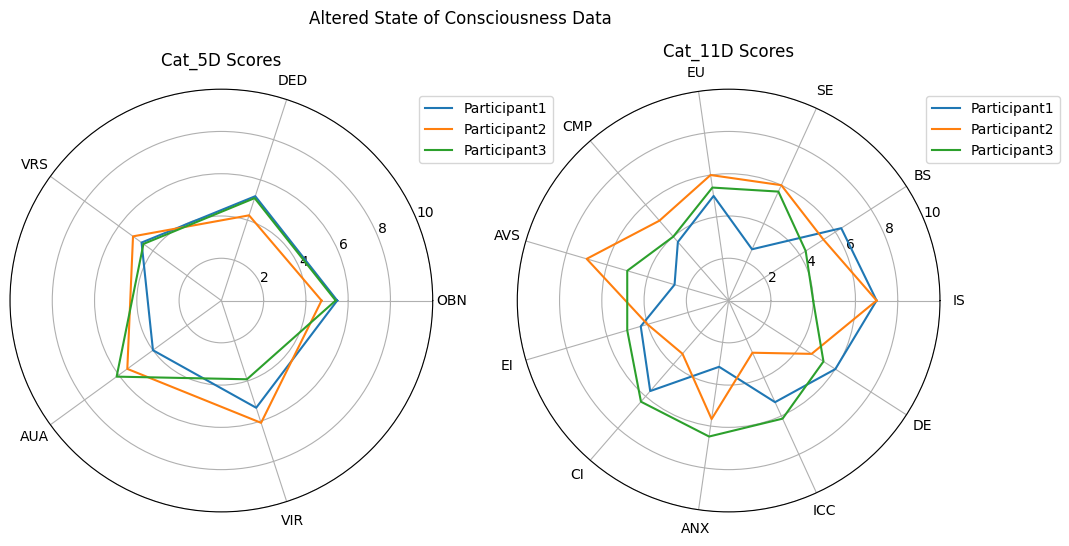

In [26]:

# Load data from the JSON file
with open('participant_categories_mean_scores.json', 'r') as file:
    data = json.load(file)

# Extract the participant information and scores for cat_5D and cat_11D
participants = [entry['Participant'] for entry in data]
cat_5D_scores = [entry['cat_5D'] for entry in data]
cat_11D_scores = [entry['cat_11D'] for entry in data]

# List of category labels for cat_5D and cat_11D
cat_5D_labels = ['OBN', 'DED', 'VRS', 'AUA', 'VIR']
cat_11D_labels = ['IS', 'BS', 'SE', 'EU', 'CMP', 'AVS', 'EI', 'CI', 'ANX', 'ICC', 'DE']

# Convert scores to lists for plotting
cat_5D_values = np.array([[participant_scores[label] for label in cat_5D_labels] for participant_scores in cat_5D_scores])
cat_11D_values = np.array([[participant_scores[label] for label in cat_11D_labels] for participant_scores in cat_11D_scores])

# Convert values to radians for polar plot
theta_5D = np.linspace(0, 2 * np.pi, len(cat_5D_labels) + 1)
theta_11D = np.linspace(0, 2 * np.pi, len(cat_11D_labels) + 1)

# Create polar plots for cat_5D and cat_11D
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': 'polar'})

for participant, value in zip(participants, cat_5D_values):
    value = np.append(value, value[0])  # Duplicate the first dimension value to close the loop
    ax1.plot(theta_5D, value, label=participant)

for participant, value in zip(participants, cat_11D_values):
    value = np.append(value, value[0])  # Duplicate the first dimension value to close the loop
    ax2.plot(theta_11D, value, label=participant)

ax1.set_thetagrids(np.degrees(theta_5D[:-1]), cat_5D_labels)
ax1.set_rlabel_position(22.5)
ax1.set_ylim(0, 10)
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax1.set_title('Cat_5D Scores')

ax2.set_thetagrids(np.degrees(theta_11D[:-1]), cat_11D_labels)
ax2.set_rlabel_position(22.5)
ax2.set_ylim(0, 10)
ax2.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax2.set_title('Cat_11D Scores')

plt.suptitle('Altered State of Consciousness Data')
plt.show()


11D graph on the 5DASC template

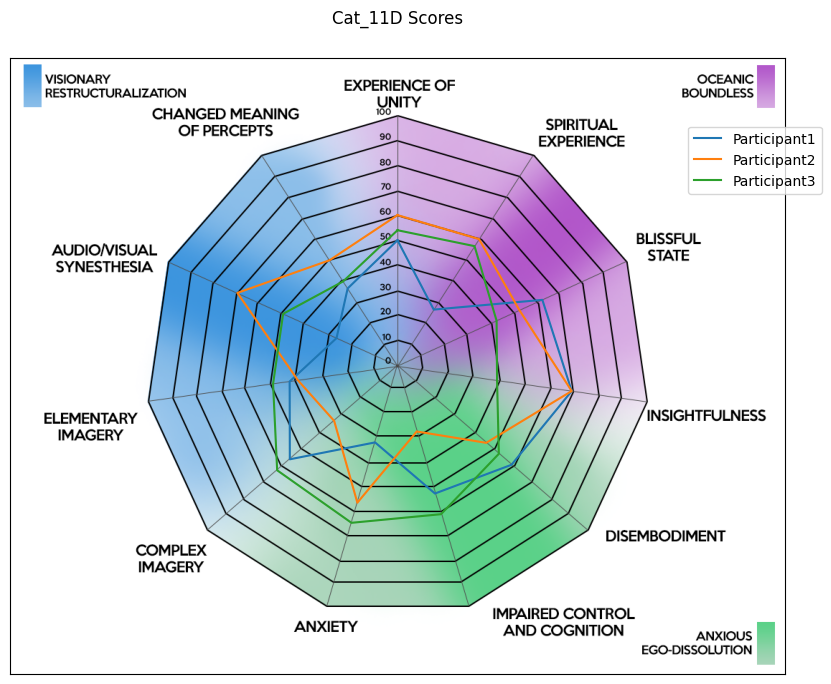

In [27]:

import matplotlib.image as mpimg

# Load data from the JSON file
with open('participant_categories_mean_scores.json', 'r') as file:
    data = json.load(file)

# Extract the participant information and scores for cat_11D
participants = [entry['Participant'] for entry in data]
cat_11D_scores = [entry['cat_11D'] for entry in data]

# List of category labels for cat_11D
cat_11D_labels = ['EU', 'CMP', 'AVS', 'EI', 'CI', 'ANX', 'ICC', 'DE', 'IS', 'BS', 'SE']

# Convert scores to lists for plotting
cat_11D_values = np.array([[participant_scores[label] for label in cat_11D_labels] for participant_scores in cat_11D_scores])

# Convert values to radians for polar plot
theta_11D = np.linspace(0, 2 * np.pi, len(cat_11D_labels) + 1)

# Load the custom template image
template_img = mpimg.imread('5DASC3d.png')  # Path to the image

# Create a figure with two axes: Cartesian background and polar foreground
fig = plt.figure(figsize=(10, 8))
ax0 = fig.add_subplot(111)  # Cartesian background axis for the image
ax = fig.add_subplot(111, polar=True, label="polar")  # Polar foreground axis

# Plot the image on the background axis
ax0.imshow(template_img, aspect='auto', alpha=1)

# Plot the lines of the polar plot on the polar axis
for participant, value in zip(participants, cat_11D_values):
    value = np.append(value, value[0])  # Duplicate the first dimension value to close the loop
    ax.plot(theta_11D, value, label=participant)

# Configure the legend
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 0.9))
ax.set_title('Cat_11D Scores')

# Configure the polar axis
# ax.set_thetagrids(np.degrees(theta_11D[:-1]), labels=cat_11D_labels)
ax.set_rlabel_position(-22.5)
ax.set_theta_offset(np.pi / 2) # Offset of 90 degrees inverse clockwise in order to start on the top like the image
ax.set_ylim(0, 12.25) # Adjust the radial axis limits
ax.set_title('Cat_11D Scores')

# Remove background and frame of the polar axis
ax.set_facecolor("None")
ax.spines['polar'].set_visible(False)
ax.grid(False)
ax.set_axis_off()

# Remove ticks and labels from the background axis
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# Show the plot
plt.show()


## Paths to access the data from Minerva. 

In [2]:
#Target data path for the psychophysics data

#out_path = '/data1/projects/dumoulinlab/Lab_members/Marco/SM-pRF/derivatives/psychophysics'
#out_path = '/data1/projects/dumoulinlab/Lab_members/Marco/legacy SM-pRF/excluded sj/mriqc'
out_path = '/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics'


#Source data path for the psychophysics data
#the * allow to select all subfolders in an URL path.
#Instead of a BIDS structure where we have sub-001, sub-002, etc, then folder for each seesion, we have directly all the task-related data in the same folder with names such as "sub-001_ses-1_task-ASC_run-1_Logs"

#paths = glob.glob('/data1/projects/dumoulinlab/Lab_members/Marco/SM-pRF/sourcedata/*/*/task/*')
#paths = glob.glob('/data1/projects/dumoulinlab/Lab_members/Marco/legacy SM-pRF/excluded sj/sourcedata/*/*/task/*')
paths = glob.glob('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/*')

#redifinition of the path in order to work in the local machine
#paths = glob.glob('/home/aqil/git/psychophysics_exps/Experiment/logs/*')

#Definition of the subjects to be included in the analysis
#logpath = [p for p in paths if os.path.isdir(p) and 'sub-008_ses-3' in p]# and '20230328'  in p]

#10mg
logpath = [p for p in paths if os.path.isdir(p) and 'sub-001_ses-2' in p or 'sub-002_ses-3' in p or 'sub-003_ses-2' in p or 'sub-004_ses-1' in p or 'sub-005_ses-3' in p or 'sub-006_ses-2' in p or 'sub-007_ses-2' in p or 'sub-008_ses-3' in p or 'sub-009_ses-3' in p or 'sub-010_ses-3' in p or'sub-011_ses-1' in p or'sub-012_ses-1' in p or'sub-013_ses-1' in p or'sub-014_ses-3' in p or'sub-015_ses-1' in p or'sub-018_ses-2' in p or'sub-019_ses-3' in p or'sub-020_ses-3' in p]
#placebo guess
logpath = [p for p in paths if os.path.isdir(p) and 'sub-001_ses-1' in p or 'sub-002_ses-2' in p or 'sub-003_ses-3' in p or 'sub-004_ses-2' in p or 'sub-005_ses-1' in p or 'sub-007_ses-3' in p or 'sub-008_ses-1' in p or 'sub-020_ses-1' in p]
#Few data with 3 groups
logpath = [p for p in paths if os.path.isdir(p) and 'sub-001_ses-1' in p or 'sub-001_ses-2' in p or 'sub-001_ses-3' in p or 'sub-002_ses-2' in p]

print(paths)
print(logpath)

NameError: name 'glob' is not defined

Let's try to understand better the data

In [8]:
import pandas as pd
events = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-001_ses-3_task-ASC_run-1_Logs20230329150149/sub-001_ses-3_task-ASC_run-1_events.tsv', sep='\\t')
events


/tmp/ipykernel_914623/156029813.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  events = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-001_ses-3_task-ASC_run-1_Logs20230329150149/sub-001_ses-3_task-ASC_run-1_events.tsv', sep='\\t')


,trial_nr,onset,event_type,phase,response,nr_frames,response_text,time,key_pressed,onset_abs,duration
0,0,0.188836,stim,0.0,NaN,NaN,A melody occurred to me that I had to constant...,NaN,NaN,1.258693,NaN
1,0,NaN,begin_next_trial,NaN,NaN,218.0,NaN,3.796997,num_0,NaN,NaN
2,0,3.821293,stim,0.0,NaN,0.0,A melody occurred to me that I had to constant...,NaN,NaN,4.891150,0.001026
3,0,3.822319,stim,0.0,NaN,NaN,A melody occurred to me that I had to constant...,NaN,NaN,4.892176,NaN
4,0,NaN,Response,NaN,NaN,127.0,A melody occurred to me that I had to constant...,5.922775,num_0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
372,92,NaN,Response,NaN,NaN,42.0,I felt as if I were paralyzed.,220.891497,num_0,NaN,NaN
373,93,220.908023,stim,0.0,NaN,25.0,I felt very profound.,NaN,NaN,221.977880,0.416640
374,93,221.324663,stim,0.0,NaN,0.0,I felt very profound.,NaN,NaN,222.394520,0.001059
375,93,221.325722,stim,0.0,NaN,NaN,I felt very profound.,NaN,NaN,222.395579,NaN


In [9]:
import numpy as np
order = np.load('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-001_ses-3_task-ASC_run-1_Logs20230329150149/sub-001_ses-3_task-ASC_run-1_trial_order.npy')

order

array([10, 89,  6, 81, 65, 43, 66, 63, 57, 18, 30, 51,  0, 90, 50, 19, 44,
       86, 34, 38, 68, 76, 62,  2, 88, 91, 45, 14, 53, 21, 69, 71, 77, 15,
       40, 25,  3, 39,  5, 24, 11, 72, 16, 27, 61, 48, 67, 78, 83, 64, 35,
       22,  9, 73, 54, 47, 55, 52, 26, 56, 12, 17, 87,  1,  4, 41, 13, 75,
       42, 31, 60, 33, 93, 29, 74, 59, 80, 28, 36, 82, 85,  7, 58, 37,  8,
       32, 92, 84, 79, 20, 70, 23, 46, 49])

So we have, on the first hand, a files .tsv which we open and named 'events' with the following 11 variables : trial_nr, onset, event_type, phase, response, nr_frames, response_text, time, key_pressed, onset_abs, duration.

On the other hand, a file .npy which we opened and gave the name 'order'. It's a 94 element tab with the order of the questions from 0 to 93 (or 1 to 94). in the fashion of [59, 0, 26, ...].

What we could do is to do an algo to collect the score from the .tsv file using the "key_pressed" variable only when it's written "Response" in the "event_type" variable. We should end with a 94 element tab with scores from 0 to 9. Then we use this tab and the knowledge of the order from the .npy array to sort out our results in a final_tab called sub-008-ses-3_task-ASC_run-1_results.npy. 

In [10]:
# Filter rows where event_type is 'Response' and select 'key_pressed'
response_scores = events.loc[events['event_type'] == 'Response', 'key_pressed'].tolist()

# Convert 'response_scores' to an array of numbers and not just strings
# Define mapping for scores
score_mapping = {'num_0': 0, 'num_1': 1, 'num_2': 2, 'num_3': 3, 'num_4': 4, 'num_5': 5, 'num_6': 6, 'num_7': 7, 'num_8': 8, 'num_9': 9, 'num_10': 10}
scores = [score_mapping[key] for key in response_scores]
response_scores_array = np.array(scores)

# Initialize a result array to store sorted scores
result = np.zeros(94, dtype=int)

# Populate the result array using the order
for i, idx in enumerate(order):
    result[idx] = scores[i]
#sorted_scores = response_scores_array[order]

print(result)
# Save the sorted scores to a NPY file
np.save('sub-008-ses-3_task-ASC_run-1_results.npy', result)

[0 2 2 0 0 0 2 0 0 3 0 2 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0 1 1 2 0 2 0 0 2 2
 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]


In [11]:
#calculate the VIR score of result which is based on the average of the elements number 2, 10, 15, 17, 24, 29, 35, 37, 41, 51, 61, 68, 74, 84 (-1 for python indexing)

VIR = np.mean(result[[1, 9, 14, 16, 23, 28, 34, 36, 40, 50, 60, 67, 73, 83]])
print(VIR)

0.8571428571428571


## Data visualisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
import json
import glob
import shutil
import os
opj = os.path.join

from PPviz import *
out_path = '/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics'
paths = glob.glob('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/*')
logpath = [p for p in paths if os.path.isdir(p) and 'sub-001_ses-1' in p or 'sub-001_ses-2' in p or 'sub-001_ses-3' in p or 'sub-002_ses-1' in p or 'sub-002_ses-2' in p or 'sub-002_ses-3' in p]

In [2]:
from PPviz import *

In [3]:
task_viz = PPviz(paths, out_path)
#task_viz = PPviz(logpath, out_path)

In [ ]:
task_viz.plot_group()

Fitting SE group results...
{'run-3': {"I experience a disintegration of my 'self' or 'ego'.": 0, 'Things look strange.': 0, 'My experience has a spiritual or mystical quality.': 0, 'I feel a profound inner peace.': 3, 'I feel like I am floating.': 2, 'I exerience a sense of merging with my surroundings.': 0, 'My thinking is muddled.': 2, 'My experience has a supernatural quality.': 0, 'I feel afraid.': 0, 'Edges appear warped.': 0, 'I feel unusual bodily sensations.': 1, 'I see geometric patterns.': 0, 'My sense of space and size is distorted.': 0, 'I feel suspicious and paranoid.': 0, "I see movement in things that aren't really moving.": 0, 'My thoughts wander freely.': 2, 'My experience has a dream-like quality.': 0, 'My perception of time is distorted.': 0, 'My imagination is extremely vivid.': 0, 'Sounds influence what I see.': 0, 'I fear losing control of my mind.': 0}, 'run-1': {'My experience has a supernatural quality.': 0, 'Things look strange.': 0, 'My imagination is extrem

In [ ]:
task_viz.fit_all()
task_viz.plot_all()
pl.close('all')


fitting data...
SEfit
{"I experience a disintegration of my 'self' or 'ego'.": 0, 'Things look strange.': 0, 'My experience has a spiritual or mystical quality.': 0, 'I feel a profound inner peace.': 3, 'I feel like I am floating.': 2, 'I exerience a sense of merging with my surroundings.': 0, 'My thinking is muddled.': 2, 'My experience has a supernatural quality.': 0, 'I feel afraid.': 0, 'Edges appear warped.': 0, 'I feel unusual bodily sensations.': 1, 'I see geometric patterns.': 0, 'My sense of space and size is distorted.': 0, 'I feel suspicious and paranoid.': 0, "I see movement in things that aren't really moving.": 0, 'My thoughts wander freely.': 2, 'My experience has a dream-like quality.': 0, 'My perception of time is distorted.': 0, 'My imagination is extremely vivid.': 0, 'Sounds influence what I see.': 0, 'I fear losing control of my mind.': 0}
SEfit
{'My experience has a supernatural quality.': 0, 'Things look strange.': 0, 'My imagination is extremely vivid.': 0, 'I e

# Plots by categories

In [8]:
#np.load group_average_ASC.npy in out_path
group_results_ASC = np.load('/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics/group_results_ASC_10.npy', allow_pickle=True).item()
group_average_ASC = np.load('/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics/group_average_ASC_10.npy',  allow_pickle=True).item()



In [ ]:
group_results_ASC

In [ ]:
group_average_ASC

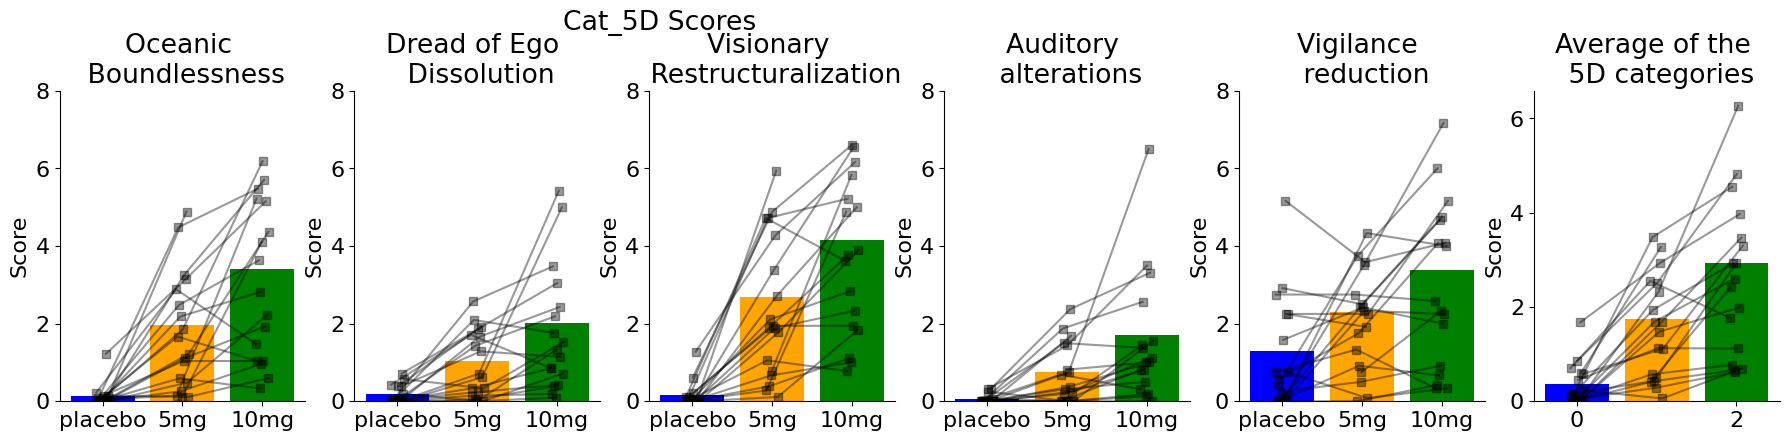

In [26]:
# Initialize the figure
fig3, ax3 = pl.subplots(1, 6, figsize=(16, 4.5))
run_labels = np.array([0.0, 1.0, 2.0])
categories_labels = ['Oceanic \n Boundlessness', 'Dread of Ego \n Dissolution', 'Visionary \n Restructuralization', 'Auditory \n alterations', 'Vigilance \n reduction']
#for each cat_5D, plot the bar plot of group_average_ASC for eahc of the three conditions (placebo, 5mg, 10mg)
for i, cat in enumerate(['OBN', 'DED', 'VRS', 'AUA', 'VIR']):
    #print(cat)
    #print(group_average_ASC[cat])
    ax3[i].bar(run_labels, [group_average_ASC['placebo']['cat_5D']['mean'][cat],group_average_ASC['5mg']['cat_5D']['mean'][cat],group_average_ASC['10mg']['cat_5D']['mean'][cat]], color=['blue', 'orange', 'green'])
    ax3[i].set_title(categories_labels[i])
    ax3[i].set_ylim([0, 9])
    ax3[i].set_ylabel('Score')

#6th plot with the average of the 5D categories
group_average_ASC_placebo_cat_5D_mean = np.mean([group_average_ASC['placebo']['cat_5D']['mean'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
group_average_ASC_5mg_cat_5D_mean = np.mean([group_average_ASC['5mg']['cat_5D']['mean'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
group_average_ASC_10mg_cat_5D_mean = np.mean([group_average_ASC['10mg']['cat_5D']['mean'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
ax3[5].bar(run_labels, [group_average_ASC_placebo_cat_5D_mean, group_average_ASC_5mg_cat_5D_mean, group_average_ASC_10mg_cat_5D_mean], color=['blue', 'orange', 'green'])
ax3[5].set_title('Average of the \n 5D categories')
ax3[5].set_ylim([0, 9])
ax3[5].set_ylabel('Score')
    
the_space = np.linspace(-0.08, 0.08, (group_results_ASC.items().__len__()))
participant_list = list(group_results_ASC.keys())

#then, for each participant, each session, each condition, plot the scatter plot of the cat_5D score for each of the three conditions (placebo, 5mg, 10mg)
for i, cat in enumerate(['OBN', 'DED', 'VRS', 'AUA', 'VIR']):

    run_labels = np.array([0.0, 1.0, 2.0])

    for participant, sessions in group_results_ASC.items():
        P510 = {}
        for session, res in sessions.items() :
            #we want, in order, placebo, 5mg, 10mg
            if res['type'] == 'placebo':
                P510['placebo'] = res['cat_5D']['mean'][cat]
            elif res['type'] == '5mg':
                P510['5mg'] = res['cat_5D']['mean'][cat]
            elif res['type'] == '10mg':
                P510['10mg'] = res['cat_5D']['mean'][cat]
            #if a type is missing but not the two others, then add np.nan to P510. FOr example, if type placebo doesn't exist but 5mg and 10mg exists, then add np.nan to P510['placebo']
            if 'placebo' not in P510:
                P510['placebo'] = np.nan
            elif '5mg' not in P510:
                P510['5mg'] = np.nan
            elif '10mg' not in P510:
                P510['10mg'] = np.nan

        run_labels += the_space[participant_list.index(participant)]  

        ax3[i].plot(run_labels, [P510['placebo'], P510['5mg'], P510['10mg']], alpha=0.4, marker='s', color='black')
        run_labels = np.array([0.0, 1.0, 2.0])
    
    ax3[i].set_xticks([0, 1, 2])
    ax3[i].set_xticklabels(['placebo', '5mg', '10mg'])

#6th plot with the average of the 5D categories
group_results_ASC_placebo_cat_5D_mean = []
group_results_ASC_5mg_cat_5D_mean = []
group_results_ASC_10mg_cat_5D_mean = []

for participant, sessions in group_results_ASC.items():
    P510 = {}
    for session, res in sessions.items() :
        #we want, in order, placebo, 5mg, 10mg
        if res['type'] == 'placebo':
            P510['placebo'] = np.mean([res['cat_5D']['mean'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
        elif res['type'] == '5mg':
            P510['5mg'] = np.mean([res['cat_5D']['mean'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
        elif res['type'] == '10mg':
            P510['10mg'] = np.mean([res['cat_5D']['mean'][cat] for cat in ['OBN', 'DED', 'VRS', 'AUA', 'VIR']])
        #if a type is missing but not the two others, then add np.nan to P510. FOr example, if type placebo doesn't exist but 5mg and 10mg exists, then add np.nan to P510['placebo']
        if 'placebo' not in P510:
            P510['placebo'] = np.nan
        elif '5mg' not in P510:
            P510['5mg'] = np.nan
        elif '10mg' not in P510:
            P510['10mg'] = np.nan

    group_results_ASC_placebo_cat_5D_mean.append(P510['placebo'])
    group_results_ASC_5mg_cat_5D_mean.append(P510['5mg'])
    group_results_ASC_10mg_cat_5D_mean.append(P510['10mg'])

for i, participant in enumerate(participant_list):
    run_labels += the_space[participant_list.index(participant)]

    ax3[5].plot(run_labels, [group_results_ASC_placebo_cat_5D_mean[i], group_results_ASC_5mg_cat_5D_mean[i], group_results_ASC_10mg_cat_5D_mean[i]], alpha=0.4, marker='s', color='black')
    run_labels = np.array([0.0, 1.0, 2.0])

fig3.subplots_adjust(top=0.8, right=1.2)

#put title on the top of the figure trandformed 1.2
fig3.suptitle('Cat_5D Scores')

fig3.show()

11D

Text(0.5, 0.98, 'Cat_11D Scores')

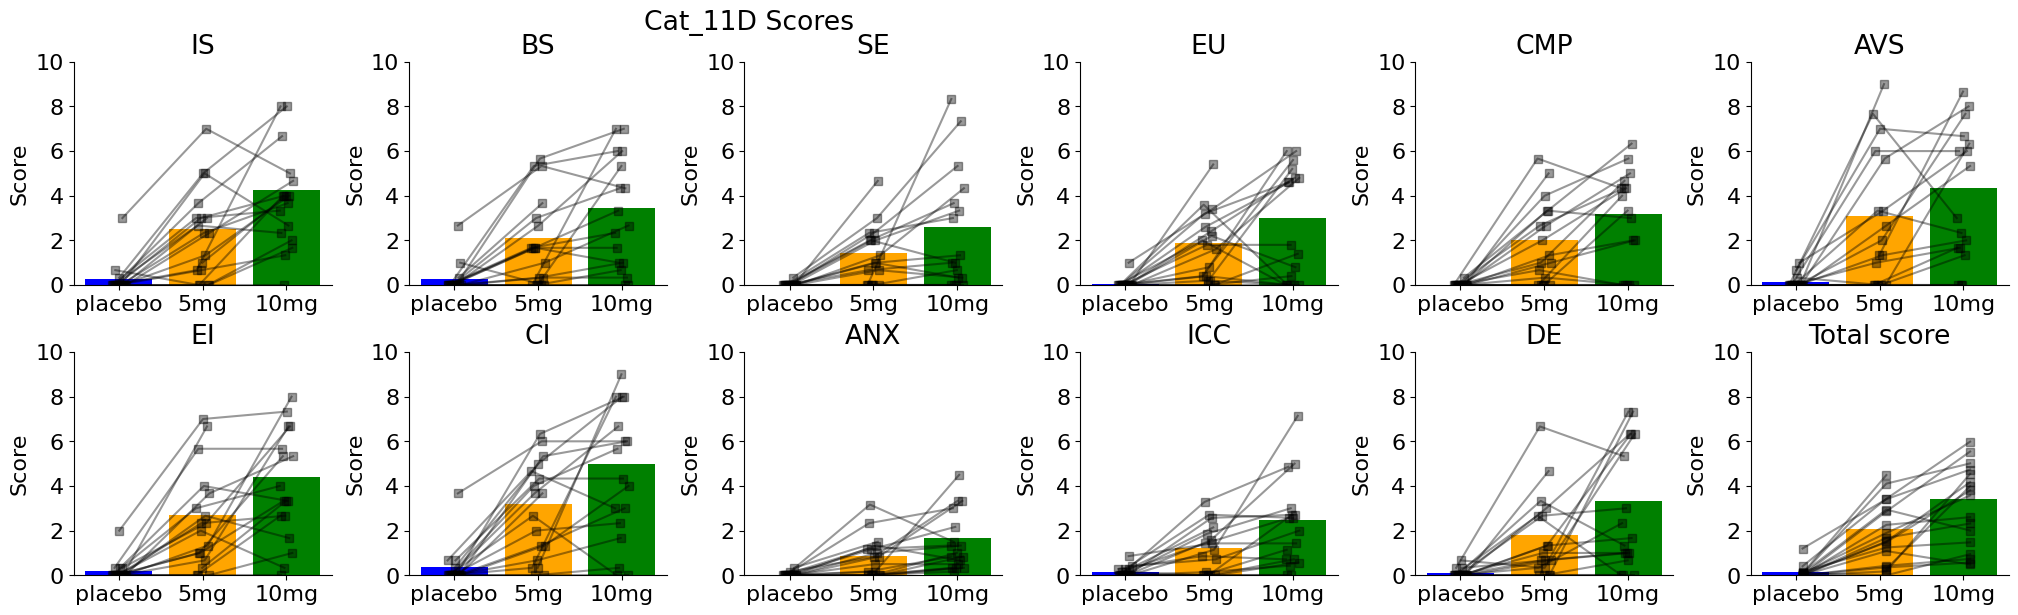

In [11]:
# Initialize the figure
fig4, ax4 = pl.subplots(2, 6, figsize=(18, 6.5))
run_labels = np.array([0.0, 1.0, 2.0])
#for each cat_11D, plot the bar plot of group_average_ASC for eahc of the three conditions (placebo, 5mg, 10mg)
for i, cat in enumerate(['IS', 'BS', 'SE', 'EU', 'CMP', 'AVS', 'EI', 'CI', 'ANX', 'ICC', 'DE']):
    #x equal i modulo 6 because we have 6 rows of 2 columns
    y = i % 6
    #y equal i divided by 6 because we have 6 rows of 2 columns
    x = i // 6
    #print(cat)
    #print(group_average_ASC[cat])
    ax4[x,y].bar(run_labels, [group_average_ASC['placebo']['cat_11D'][cat],group_average_ASC['5mg']['cat_11D'][cat],group_average_ASC['10mg']['cat_11D'][cat]], color=['blue', 'orange', 'green'])
    ax4[x,y].set_title(cat)
    ax4[x,y].set_ylim([0, 10])
    ax4[x,y].set_ylabel('Score')

the_space = np.linspace(-0.08, 0.08, (group_results_ASC.items().__len__()))
participant_list = list(group_results_ASC.keys())

#then, for each participant, each session, each condition, plot the scatter plot of the cat_11D score for each of the three conditions (placebo, 5mg, 10mg)
for i, cat in enumerate(['IS', 'BS', 'SE', 'EU', 'CMP', 'AVS', 'EI', 'CI', 'ANX', 'ICC', 'DE']):
    run_labels = np.array([0.0, 1.0, 2.0])
    #x equal i modulo 6 because we have 6 rows of 2 columns
    y = i % 6
    #y equal i divided by 6 because we have 6 rows of 2 columns
    x = i // 6

    for participant, sessions in group_results_ASC.items():
        P510 = {}
        for session, res in sessions.items() :
            #we want, in order, placebo, 5mg, 10mg
            if res['type'] == 'placebo':
                P510['placebo'] = res['cat_11D'][cat]
            elif res['type'] == '5mg':
                P510['5mg'] = res['cat_11D'][cat]
            elif res['type'] == '10mg':
                P510['10mg'] = res['cat_11D'][cat]
            #if a type is missing but not the two others, then add np.nan to P510. FOr example, if type placebo doesn't exist but 5mg and 10mg exists, then add np.nan to P510['placebo']
            if 'placebo' not in P510:
                P510['placebo'] = np.nan
            elif '5mg' not in P510:
                P510['5mg'] = np.nan
            elif '10mg' not in P510:
                P510['10mg'] = np.nan

        run_labels += the_space[participant_list.index(participant)]

        ax4[x,y].plot(run_labels, [P510['placebo'], P510['5mg'], P510['10mg']], alpha=0.4, marker='s', color='black')
        run_labels = np.array([0.0, 1.0, 2.0])

    ax4[x,y].set_xticks([0, 1, 2])
    ax4[x,y].set_xticklabels(['placebo', '5mg', '10mg'])
""" 
# Remove the last subplot
fig4.delaxes(ax4[1, 5])
# Set a text box on the upper right listing the accronyms of the 11D categories
textstr2 = '\n'.join((f"11D categories:",
                    f"EU: Experience of unity",
                    f"SE: Spiritual experience",
                    f"BS: Blissful state",
                    f"IS: Insightfulness",
                    f"DE: Disembodiment",
                    f"ICC: Impaired control and cognition",
                    f"ANX: Anxiety",
                    f"CI: Complex imagery",
                    f"EI: Elementary imagery",
                    f"AVS: Audio-visual synesthesia",
                    f"CMP: Changed meaning of percepts"))
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax4[1, 4].text(2.9, 1, textstr2, fontsize=10, bbox=props) """

#the last subplot ax4[1, 4] with the total score i.e. average of all dimensions for each Subject and the group
group_average_ASC_placebo_total = np.mean([group_average_ASC['placebo']['cat_11D'][cat] for cat in ['IS', 'BS', 'SE', 'EU', 'CMP', 'AVS', 'EI', 'CI', 'ANX', 'ICC', 'DE']])
group_average_ASC_5mg_total = np.mean([group_average_ASC['5mg']['cat_11D'][cat] for cat in ['IS', 'BS', 'SE', 'EU', 'CMP', 'AVS', 'EI', 'CI', 'ANX', 'ICC', 'DE']])
group_average_ASC_10mg_total = np.mean([group_average_ASC['10mg']['cat_11D'][cat] for cat in ['IS', 'BS', 'SE', 'EU', 'CMP', 'AVS', 'EI', 'CI', 'ANX', 'ICC', 'DE']])
ax4[1,5].bar(run_labels, [group_average_ASC_placebo_total, group_average_ASC_5mg_total, group_average_ASC_10mg_total], color=['blue', 'orange', 'green'])
ax4[1,5].set_title('Total score')
ax4[1,5].set_ylim([0, 10])
ax4[1,5].set_ylabel('Score')

group_results_ASC_participants_placebo_total = []
group_results_ASC_participants_5mg_total = []
group_results_ASC_participants_10mg_total = []

for participant, sessions in group_results_ASC.items():
    P510 = {}
    for session, res in sessions.items() :
        #we want, in order, placebo, 5mg, 10mg
        if res['type'] == 'placebo':
            P510['placebo'] = np.mean([res['cat_11D']['mean'][cat] for cat in ['IS', 'BS', 'SE', 'EU', 'CMP', 'AVS', 'EI', 'CI', 'ANX', 'ICC', 'DE']])
        elif res['type'] == '5mg':
            P510['5mg'] = np.mean([res['cat_11D']['mean'][cat] for cat in ['IS', 'BS', 'SE', 'EU', 'CMP', 'AVS', 'EI', 'CI', 'ANX', 'ICC', 'DE']])
        elif res['type'] == '10mg':
            P510['10mg'] = np.mean([res['cat_11D']['mean'][cat] for cat in ['IS', 'BS', 'SE', 'EU', 'CMP', 'AVS', 'EI', 'CI', 'ANX', 'ICC', 'DE']])
        #if a type is missing but not the two others, then add np.nan to P510. FOr example, if type placebo doesn't exist but 5mg and 10mg exists, then add np.nan to P510['placebo']
        if 'placebo' not in P510:
            P510['placebo'] = np.nan
        elif '5mg' not in P510:
            P510['5mg'] = np.nan
        elif '10mg' not in P510:
            P510['10mg'] = np.nan
    group_results_ASC_participants_placebo_total.append(P510['placebo'])
    group_results_ASC_participants_5mg_total.append(P510['5mg'])
    group_results_ASC_participants_10mg_total.append(P510['10mg'])

run_labels = np.array([0.0, 1.0, 2.0])
run_labels += the_space[participant_list.index(participant)]
ax4[1,5].plot(run_labels, [group_results_ASC_participants_placebo_total, group_results_ASC_participants_5mg_total, group_results_ASC_participants_10mg_total], alpha=0.4, marker='s', color='black')
run_labels = np.array([0.0, 1.0, 2.0])

ax4[1,5].set_xticks([0, 1, 2])
ax4[1,5].set_xticklabels(['placebo', '5mg', '10mg'])

fig4.subplots_adjust(top=0.9, right=1.2, hspace=0.3, wspace=0.3)
fig4.suptitle('Cat_11D Scores')


### Subjective Experience Questionnaires

let's try to understand better the data of SE questionnaires

In [14]:
log1 = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-001_ses-3_task-SE_run-1_Logs20230329094358/sub-001_ses-3_task-SE_run-1_log.txt', sep='\\t')
log1

/tmp/ipykernel_243872/2682844552.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  log1 = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-001_ses-3_task-SE_run-1_Logs20230329094358/sub-001_ses-3_task-SE_run-1_log.txt', sep='\\t')


,8.9665,WARNING,"We strongly recommend you activate the PTB sound engine in PsychoPy prefs as the preferred audio engine. Its timing is vastly superior. Your prefs are currently set to use ['sounddevice', 'PTB', 'pyo', 'pygame'] (in that order)."
0,10.1116,EXP,Created unnamed Circle = Circle(__class__=<cla...
1,10.1140,EXP,Created unnamed ShapeStim = ShapeStim(__class_...
2,10.1162,EXP,Created unnamed ShapeStim = ShapeStim(__class_...
3,10.1184,EXP,Created unnamed ShapeStim = ShapeStim(__class_...
4,10.1253,EXP,window1: recordFrameIntervals = True
...,...,...,...
8060,110.9618,EXP,Created unnamed TextStim = TextStim(__class__=...
8061,110.9785,EXP,Created unnamed TextStim = TextStim(__class__=...
8062,110.9927,DATA,Keypress: num_0
8063,111.0093,EXP,window1: recordFrameIntervals = False


In [15]:
events = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-001_ses-3_task-SE_run-1_Logs20230329094358/sub-001_ses-3_task-SE_run-1_events.tsv', sep='\\t')
events2 = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-001_ses-3_task-SE_run-2_Logs20230329114547/sub-001_ses-3_task-SE_run-2_events.tsv', sep='\\t')
events3 = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-001_ses-3_task-SE_run-3_Logs20230329131847/sub-001_ses-3_task-SE_run-3_events.tsv', sep='\\t')
events4 = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-001_ses-3_task-SE_run-4_Logs20230329150019/sub-001_ses-3_task-SE_run-4_events.tsv', sep='\\t')
events3

/tmp/ipykernel_243872/940326573.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  events = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-001_ses-3_task-SE_run-1_Logs20230329094358/sub-001_ses-3_task-SE_run-1_events.tsv', sep='\\t')
/tmp/ipykernel_243872/940326573.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  events2 = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-001_ses-3_task-SE_run-2_Logs20230329114547/sub-001_ses-3_task-SE_run-2_events.tsv', sep='\\t')
/tmp/ipykernel_243872/940326573.py:3: ParserWarning: Falling back to the 'p

,trial_nr,onset,event_type,phase,response,nr_frames,response_text,time,key_pressed,onset_abs,duration
0,0,0.191469,stim,0.0,NaN,NaN,I experience a disintegration of my 'self' or ...,NaN,NaN,1.303074,NaN
1,0,NaN,begin_next_trial,NaN,NaN,121.0,NaN,2.191886,num_enter,NaN,NaN
2,0,2.207662,stim,0.0,NaN,0.0,I experience a disintegration of my 'self' or ...,NaN,NaN,3.319267,0.001022
3,0,2.208684,stim,0.0,NaN,NaN,I experience a disintegration of my 'self' or ...,NaN,NaN,3.320289,NaN
4,0,NaN,Response,NaN,NaN,789.0,I experience a disintegration of my 'self' or ...,15.340331,num_0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
80,19,NaN,Response,NaN,NaN,86.0,Sounds influence what I see.,69.754157,num_0,NaN,NaN
81,20,69.770701,stim,0.0,NaN,25.0,I fear losing control of my mind.,NaN,NaN,70.882306,0.416650
82,20,70.187351,stim,0.0,NaN,0.0,I fear losing control of my mind.,NaN,NaN,71.298956,0.001165
83,20,70.188516,stim,0.0,NaN,NaN,I fear losing control of my mind.,NaN,NaN,71.300121,NaN


In [16]:
SE_question = events.loc[events['key_pressed'].notnull()]
SE_question2 = events2.loc[events2['key_pressed'].notnull()]
SE_question3 = events3.loc[events3['key_pressed'].notnull()]
SE_question4 = events4.loc[events4['key_pressed'].notnull()]

SE_question

,trial_nr,onset,event_type,phase,response,nr_frames,response_text,time,key_pressed,onset_abs,duration
1,0,NaN,begin_next_trial,NaN,NaN,3836.0,NaN,64.212521,space,NaN,NaN
4,0,NaN,Response,NaN,NaN,106.0,My experience has a supernatural quality.,65.986256,num_0,NaN,NaN
8,1,NaN,Response,NaN,NaN,94.0,Things look strange.,67.969849,num_0,NaN,NaN
12,2,NaN,Response,NaN,NaN,86.0,My imagination is extremely vivid.,69.819358,num_0,NaN,NaN
16,3,NaN,Response,NaN,NaN,152.0,I exerience a sense of merging with my surroun...,72.769204,num_0,NaN,NaN
20,4,NaN,Response,NaN,NaN,50.0,I see geometric patterns.,74.019125,num_0,NaN,NaN
24,5,NaN,Response,NaN,NaN,55.0,I feel suspicious and paranoid.,75.352724,num_0,NaN,NaN
28,6,NaN,Response,NaN,NaN,84.0,I feel a profound inner peace.,77.169283,num_2,NaN,NaN
32,7,NaN,Response,NaN,NaN,60.0,Sounds influence what I see.,78.585862,num_0,NaN,NaN
36,8,NaN,Response,NaN,NaN,134.0,My thoughts wander freely.,81.235698,num_3,NaN,NaN


In [17]:
#make an ordered dictionnary with, for each question found in response_text content as key the key_pressed as value. DOn't forget to remove the 'num_' part of the key_pressed and convert it to int. Don't take into account nan response_text
SE_question_dict = {row['response_text']: int(row['key_pressed'][4:]) for index, row in SE_question.iterrows() if row['response_text'] is not np.nan}
SE_question_dict2 = {row['response_text']: int(row['key_pressed'][4:]) for index, row in SE_question2.iterrows() if row['response_text'] is not np.nan}
SE_question_dict3 = {row['response_text']: int(row['key_pressed'][4:]) for index, row in SE_question3.iterrows() if row['response_text'] is not np.nan}
SE_question_dict4 = {row['response_text']: int(row['key_pressed'][4:]) for index, row in SE_question4.iterrows() if row['response_text'] is not np.nan}

SE_question_dict

{'My experience has a supernatural quality.': 0,
 'Things look strange.': 0,
 'My imagination is extremely vivid.': 0,
 'I exerience a sense of merging with my surroundings.': 0,
 'I see geometric patterns.': 0,
 'I feel suspicious and paranoid.': 0,
 'I feel a profound inner peace.': 2,
 'Sounds influence what I see.': 0,
 'My thoughts wander freely.': 3,
 'My perception of time is distorted.': 0,
 'I feel afraid.': 0,
 'My thinking is muddled.': 1,
 'I fear losing control of my mind.': 0,
 'I feel unusual bodily sensations.': 1,
 'My experience has a spiritual or mystical quality.': 0,
 "I experience a disintegration of my 'self' or 'ego'.": 0,
 'I feel like I am floating.': 0,
 'My experience has a dream-like quality.': 0,
 'My sense of space and size is distorted.': 0,
 "I see movement in things that aren't really moving.": 0,
 'Edges appear warped.': 0}

In [18]:
SE_question.shape

(22, 11)

In [19]:
SE_question_dict

{'My experience has a supernatural quality.': 0,
 'Things look strange.': 0,
 'My imagination is extremely vivid.': 0,
 'I exerience a sense of merging with my surroundings.': 0,
 'I see geometric patterns.': 0,
 'I feel suspicious and paranoid.': 0,
 'I feel a profound inner peace.': 2,
 'Sounds influence what I see.': 0,
 'My thoughts wander freely.': 3,
 'My perception of time is distorted.': 0,
 'I feel afraid.': 0,
 'My thinking is muddled.': 1,
 'I fear losing control of my mind.': 0,
 'I feel unusual bodily sensations.': 1,
 'My experience has a spiritual or mystical quality.': 0,
 "I experience a disintegration of my 'self' or 'ego'.": 0,
 'I feel like I am floating.': 0,
 'My experience has a dream-like quality.': 0,
 'My sense of space and size is distorted.': 0,
 "I see movement in things that aren't really moving.": 0,
 'Edges appear warped.': 0}

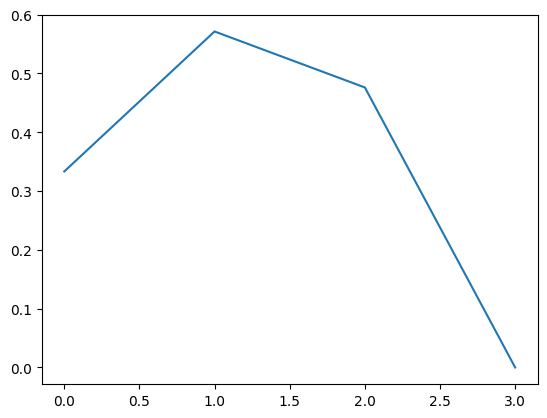

In [20]:
#For the four runs, calculate four average scores corresponding to all questions of the SE task
SE_score = np.mean(list(SE_question_dict.values()))
SE_score2 = np.mean(list(SE_question_dict2.values()))
SE_score3 = np.mean(list(SE_question_dict3.values()))
SE_score4 = np.mean(list(SE_question_dict4.values()))

#plot the four scores in the same plot to see if there is a trend
plt.plot([SE_score, SE_score2, SE_score3, SE_score4])

We could either plot the questions as it is, which would do 20 parameters. We can infer on the possible 11D-ASC dimensions it corresponds 

In [21]:
order = np.load('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/sub-001_ses-3_task-SE_run-1_Logs20230329094358/sub-001_ses-3_task-SE_run-1_trial_order.npy')
order

array([14, 12,  0, 11,  7, 20, 16,  2,  5,  6, 18,  9, 19,  4, 17, 15, 13,
        1,  3, 10,  8])

In [22]:
#reorder the SE_question_dict where the nth element of the 'order' array is the index of the nth element of the 'new_SE_question' array
""" new_SE_question = [np.zeros(21, dtype=object)]
for i, idx in enumerate(order):
    new_SE_question[idx] = SE_question[i]
new_SE_question """


' new_SE_question = [np.zeros(21, dtype=object)]\nfor i, idx in enumerate(order):\n    new_SE_question[idx] = SE_question[i]\nnew_SE_question '

In [23]:
dict_SE_ASC = {
    "My experience has a supernatural quality.": "SE",
    "Things look strange.": "DE",
    "My imagination is extremely vivid.": "IS",
    "I exerience a sense of merging with my surroundings.": "EU",
    "I see geometric patterns.": "CI",
    "I feel suspicious and paranoid.": "ANX",
    "I feel a profound inner peace.": "BS",
    "Sounds influence what I see.": "AVS",
    "My thoughts wander freely.": "IS",
    "My perception of time is distorted.": "ICC",
    "I feel afraid.": "ANX",
    "My thinking is muddled.": "ICC",
    "I fear losing control of my mind.": "ICC",
    "I feel unusual bodily sensations.": "CI",
    "My experience has a spiritual or mystical quality.": "SE",
    "I experience a disintegration of my 'self' or 'ego'.": "EU",
    "I feel like I am floating.": "EU",
    "My experience has a dream-like quality.": "IS",
    "My sense of space and size is distorted.": "ICC",
    "I see movement in things that aren't really moving.": "CI",
    "Edges appear warped.": "CI"
}

In [24]:
#using the dict_SE_ASC, create a new dictionnary which calculate, for each ASC category, the average score it was donce in the SE_question_dict. 
#For example, for the category 'SE', the average score is the average of the scores of the questions 'My experience has a supernatural quality' and 'My experience has a spiritual or mystical quality' in the SE_question_dict
#The result is a dictionnary with the ASC category as key and the average score as value
SE_ASC_dict = {}

SE_question_dict['Edges appear warped.']

for key, value in dict_SE_ASC.items():
    if value not in SE_ASC_dict:
        SE_ASC_dict[value] = []
    print(SE_question_dict[key])
    SE_ASC_dict[value].append(SE_question_dict[key])

#then calculate the mean of the scores for each ASC category
SE_ASC_dict_mean = {cat: np.mean(SE_ASC_dict[cat]) for cat in SE_ASC_dict}
SE_ASC_dict_mean


0
0
0
0
0
0
2
0
3
0
0
1
0
1
0
0
0
0
0
0
0


{'SE': 0.0,
 'DE': 0.0,
 'IS': 1.0,
 'EU': 0.0,
 'CI': 0.25,
 'ANX': 0.0,
 'BS': 2.0,
 'AVS': 0.0,
 'ICC': 0.25}

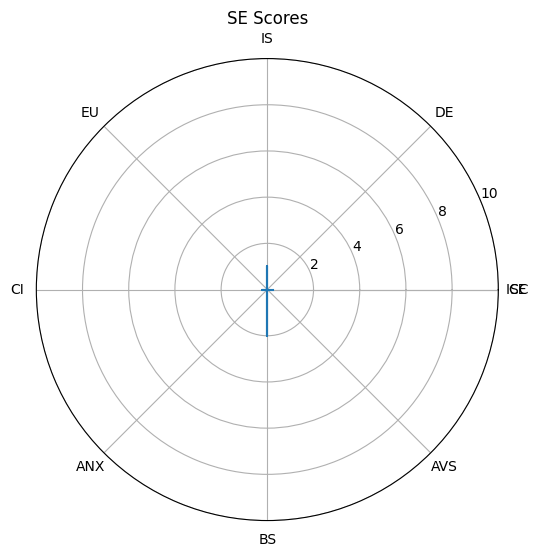

In [25]:
#plot the results on a polar plot for this participant as we did for the ASC data 11D-ASC.
#First, create a list of the ASC categories in the same order as the SE_ASC_dict_mean
SE_ASC_categories = ['SE', 'DE', 'IS', 'EU', 'CI', 'ANX', 'BS', 'AVS', 'ICC']
#Then, create a list of the scores in the same order as the SE_ASC_categories
SE_ASC_scores = [SE_ASC_dict_mean[cat] for cat in SE_ASC_categories]
#Then, create a list of the angles in radians for the polar plot
theta_SE_ASC = np.linspace(0, 2 * np.pi, len(SE_ASC_categories) )
#Then, create a figure with a polar axis
fig, ax = plt.subplots(1, 1, figsize=(6, 6), subplot_kw={'projection': 'polar'})
#Then, plot the scores on the polar axis
ax.plot(theta_SE_ASC, SE_ASC_scores)
#Then, set the labels of the polar axis
ax.set_thetagrids(np.degrees(theta_SE_ASC), labels=SE_ASC_categories)
#Then, set the radial axis limits
ax.set_ylim(0, 10)
#Then, set the title of the polar plot
ax.set_title('SE Scores')
#Then, show the plot
plt.show()


In [26]:
df = np.load('/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics/group_results_SE.npy', allow_pickle=True)
df

array({'sub-001': {'ses-3': {'run-3': {"I experience a disintegration of my 'self' or 'ego'.": 0, 'Things look strange.': 0, 'My experience has a spiritual or mystical quality.': 0, 'I feel a profound inner peace.': 3, 'I feel like I am floating.': 2, 'I exerience a sense of merging with my surroundings.': 0, 'My thinking is muddled.': 2, 'My experience has a supernatural quality.': 0, 'I feel afraid.': 0, 'Edges appear warped.': 0, 'I feel unusual bodily sensations.': 1, 'I see geometric patterns.': 0, 'My sense of space and size is distorted.': 0, 'I feel suspicious and paranoid.': 0, "I see movement in things that aren't really moving.": 0, 'My thoughts wander freely.': 2, 'My experience has a dream-like quality.': 0, 'My perception of time is distorted.': 0, 'My imagination is extremely vivid.': 0, 'Sounds influence what I see.': 0, 'I fear losing control of my mind.': 0}, 'run-1': {'My experience has a supernatural quality.': 0, 'Things look strange.': 0, 'My imagination is extrem

### Blood pressure over time

In [27]:
Blood_pressure_intake = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/Bloodpressure - Intake.csv', header=[0,1]).iloc[:-3, 1:]
Blood_pressure_session1 = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/Bloodpressure - Session 1.csv', header=[0,2]).iloc[:-3, 1:]
Blood_pressure_session2 = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/Bloodpressure - Session 2.csv', header=[0,2]).iloc[:-3, 1:]
Blood_pressure_session3 = pd.read_csv('/data1/projects/dumoulinlab/Lab_members/Tom/SM-pRF/sourcedata/Bloodpressure - Session 3.csv', header=[0,2]).iloc[:-3, 1:]
Blood_pressure_intake


,Intake session,Unnamed: 2_level_0,Unnamed: 3_level_0
,1 - sys,1 - dia,1 - pul
0,x,x,x
1,x,x,x
2,113,73,59
3,x,x,x
4,x,x,x
5,92,64,52
6,123,81,56
7,144,82,51
8,101,74,62


In [ ]:
#make a dictionnary with the participant as key and the blood pressure as value with intake, session1, session2 and session3 as keys. 
#Each row is a participant. row 0 is for sub_001, etc. The first 3 columns are for run-1 with sys, dia, pul, the next 3 for run-2 , etc. If the participant didn't do the run, then the value is nan
Blood_pressure_dict = {}
for index, row in Blood_pressure_intake.iterrows():
    Blood_pressure_dict['sub-' + str(index+1).zfill(3)] = {'intake': row.tolist()}
for index, row in Blood_pressure_session1.iterrows():
    Blood_pressure_dict['sub-' + str(index+1).zfill(3)]['ses-1'] = row.tolist()
for index, row in Blood_pressure_session2.iterrows():
    Blood_pressure_dict['sub-' + str(index+1).zfill(3)]['ses-2'] = row.tolist()
for index, row in Blood_pressure_session3.iterrows():
    Blood_pressure_dict['sub-' + str(index+1).zfill(3)]['ses-3'] = row.tolist()

Blood_pressure_dict

# change Blood_pressure_dict transform all 'x' by a nan
Blood_pressure_dict = {participant: {session: [np.nan if x == 'x' else x for x in res] for session, res in sessions.items()} for participant, sessions in Blood_pressure_dict.items()}
#transform empty string ' ' or '  ' by a nan
Blood_pressure_dict = {participant: {session: [np.nan if x == ' ' or x == '  ' else x for x in res] for session, res in sessions.items()} for participant, sessions in Blood_pressure_dict.items()}
#transform all the string into float
Blood_pressure_dict = {participant: {session: [float(x) for x in res] for session, res in sessions.items()} for participant, sessions in Blood_pressure_dict.items()}
Blood_pressure_dict


In [29]:
#We have Blood_pressure_dict which gives us, for each session of each participant, the 12 blood measurements. The first 3 are the sys, dial and pul of run-1. The next 3 are the sys, dial and pul of run-2, etc.
#We want to calculate the average 12 blood measurements for each participant for each type of sessions. For example, we want to have the global average 12 measurements for 'placebo' sessions.

groups_dict = {'placebo':['sub-001_ses-1','sub-002_ses-2','sub-003_ses-3','sub-004_ses-2','sub-005_ses-1','sub-006_ses-3','sub-007_ses-3','sub-008_ses-1',
                         'sub-009_ses-2','sub-010_ses-1','sub-011_ses-3','sub-012_ses-2','sub-013_ses-3','sub-014_ses-2','sub-015_ses-2','sub-018_ses-1','sub-019_ses-2','sub-020_ses-1'],

              '5mg':['sub-001_ses-3','sub-002_ses-1','sub-003_ses-1','sub-004_ses-3','sub-005_ses-2','sub-006_ses-1','sub-007_ses-1','sub-008_ses-3',
                    'sub-009_ses-1','sub-010_ses-2','sub-011_ses-2','sub-012_ses-3','sub-013_ses-2','sub-014_ses-1','sub-015_ses-3','sub-018_ses-3','sub-019_ses-1','sub-020_ses-2'],

              '10mg':['sub-001_ses-2','sub-002_ses-3','sub-003_ses-2','sub-004_ses-1','sub-005_ses-3','sub-006_ses-2','sub-007_ses-2','sub-008_ses-2',
                     'sub-009_ses-3','sub-010_ses-3','sub-011_ses-1','sub-012_ses-1','sub-013_ses-1','sub-014_ses-3','sub-015_ses-1','sub-018_ses-2','sub-019_ses-3','sub-020_ses-3']}

#initialize a dictionnary with the three types of sessions as keys and an empty list as value
groups_dict_mean = {group: [] for group in groups_dict}

#based on the groups_dict, calculate the average 12 blood measurements for each participant for each type of sessions. For example, we want to have the global average 12 measurements for 'placebo' sessions.
for group, participants in groups_dict.items():
      for participant_session in participants:
            participant = participant_session[:-6]
            session = participant_session[-5:]
            groups_dict_mean[group].append(Blood_pressure_dict[participant][session])

#transofrm all 'x' by a nan
groups_dict_mean = {group: [[np.nan if x == 'x' else x for x in participant] for participant in participants] for group, participants in groups_dict_mean.items()}
#transform all the string into float
groups_dict_mean = {group: [[float(x) for x in participant] for participant in participants] for group, participants in groups_dict_mean.items()}

#And then calculate the average of the 12 blood measurements for each type of sessions. For example, we want to have the global average 12 measurements for 'placebo' sessions.
groups_dict_mean = {group: np.nanmean(participants, axis=0) for group, participants in groups_dict_mean.items()}

groups_dict_mean

{'placebo': array([113.33333333,  68.33333333,  64.33333333, 111.83333333,
         68.16666667,  58.41666667, 112.33333333,  72.5       ,
         55.83333333, 113.        ,  70.        ,  62.36363636]),
 '5mg': array([114.46153846,  69.        ,  65.92307692, 122.5       ,
         77.        ,  58.08333333, 117.58333333,  77.25      ,
         61.66666667, 114.45454545,  71.90909091,  63.18181818]),
 '10mg': array([116.54545455,  70.90909091,  64.54545455, 124.66666667,
         81.16666667,  60.25      , 122.28571429,  81.        ,
         62.71428571, 121.71428571,  76.42857143,  63.14285714])}

In [ ]:
groups_dict = {'placebo':['sub-001_ses-1','sub-002_ses-2','sub-003_ses-3','sub-004_ses-2','sub-005_ses-1','sub-006_ses-3','sub-007_ses-3','sub-008_ses-1',
                         'sub-009_ses-2','sub-010_ses-1','sub-011_ses-3','sub-012_ses-2','sub-013_ses-3','sub-014_ses-2','sub-015_ses-2','sub-018_ses-1','sub-019_ses-2','sub-020_ses-1'],

              '5mg':['sub-001_ses-3','sub-002_ses-1','sub-003_ses-1','sub-004_ses-3','sub-005_ses-2','sub-006_ses-1','sub-007_ses-1','sub-008_ses-3',
                    'sub-009_ses-1','sub-010_ses-2','sub-011_ses-2','sub-012_ses-3','sub-013_ses-2','sub-014_ses-1','sub-015_ses-3','sub-018_ses-3','sub-019_ses-1','sub-020_ses-2'],

              '10mg':['sub-001_ses-2','sub-002_ses-3','sub-003_ses-2','sub-004_ses-1','sub-005_ses-3','sub-006_ses-2','sub-007_ses-2','sub-008_ses-2',
                     'sub-009_ses-3','sub-010_ses-3','sub-011_ses-1','sub-012_ses-1','sub-013_ses-1','sub-014_ses-3','sub-015_ses-1','sub-018_ses-2','sub-019_ses-3','sub-020_ses-3']}


#Add, for each session, the type (placebo, 5mg, 10mg) of the session using groups_dict
# for participant, sessions in Blood_pressure_dict.items():
#     for session, res in sessions.items():
#         for group, participants in groups_dict.items():
#             participant_name = participant + '_' + session
#             if participant_name in participants:
#                 Blood_pressure_dict[participant][session].append(group)

# Blood_pressure_dict

[113.33333333  68.33333333  64.33333333 111.83333333  68.16666667
  58.41666667 112.33333333  72.5         55.83333333 113.
  70.          62.36363636]
[114.46153846  69.          65.92307692 122.5         77.
  58.08333333 117.58333333  77.25        61.66666667 114.45454545
  71.90909091  63.18181818]
[116.54545455  70.90909091  64.54545455 124.66666667  81.16666667
  60.25       122.28571429  81.          62.71428571 121.71428571
  76.42857143  63.14285714]
placebo
5mg
10mg


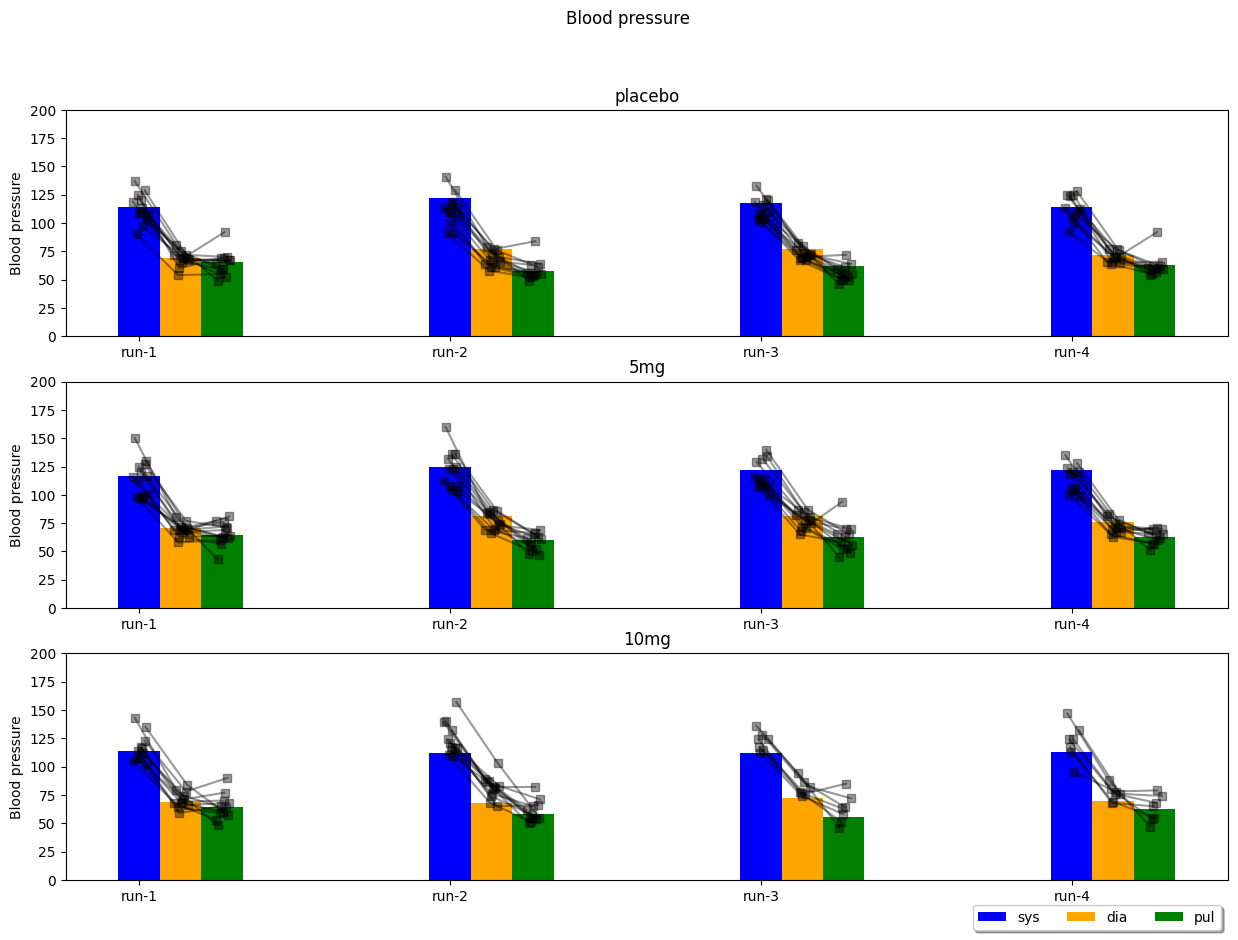

In [34]:
#We have groups_dict_mean which gives us, for each type of sessions, the average 12 blood measurements. The first 3 are the sys, dial and pul of run-1. The next 3 are the sys, dial and pul of run-2, etc.
#We have Blood_pressure_dict which gives us, for each session of each participant, the 12 blood measurements. The first 3 are the sys, dial and pul of run-1. The next 3 are the sys, dial and pul of run-2, etc.

#We want to plot three subplot on top of each other. The first one shows the results for the sessions 'placebo', the second one for the sessions '5mg' and the third one for the sessions '10mg'.
#For each subplot, we want to regroup the 12 blood measurements in 4 groups of 3 measurements. The first group is for the run-1, the second group is for the run-2, etc. Each run having 3 measurements (sys, dia, pul) displayed next to each others.
#So for example, the first subplot is 'placebo' sessions. For each participant, we plot the 3 first measurements (sys, dia, pul) of run-1 next to each other, then the 3 measurements of run-2, etc.


# Initialize the figure
fig5, ax5 = pl.subplots(3, 1, figsize=(15, 10))
run_labels = np.array([0.0, 0.4, 0.8])
#For each type of sessions, plot the 12 blood measurements in 4 groups of 3 measurements. The first group is for the run-1, the second group is for the run-2, etc. Each run having 3 measurements (sys, dia, pul) displayed next to each others.
for i, group in enumerate(['placebo', '5mg', '10mg']):
    print(groups_dict_mean[group])
    ax5[i-1].bar(run_labels, groups_dict_mean[group][0:3], color=['blue', 'orange', 'green'], width=0.4, label=['sys', 'dia','pul'])
    ax5[i-1].bar(run_labels+3, groups_dict_mean[group][3:6], color=['blue', 'orange', 'green'], width=0.4)
    ax5[i-1].bar(run_labels+6, groups_dict_mean[group][6:9], color=['blue', 'orange', 'green'], width=0.4)
    ax5[i-1].bar(run_labels+9, groups_dict_mean[group][9:12], color=['blue', 'orange', 'green'], width=0.4)

#For each participant, plot the 3 first measurements (sys, dia, pul) of run-1 next to each other, then the 3 measurements of run-2, etc.
for i, group in enumerate(['placebo', '5mg', '10mg']):
    #for each session, check if it's placebo or 5mg or 10mg
    for participant_session in groups_dict[group]:
        for participant, sessions in Blood_pressure_dict.items():
            for session, res in sessions.items():
                #if the participant_session is in the right group (placebo, 5mg or 10mg), then plot the 3 first measurements (sys, dia, pul) of run-1 next to each other, then the 3 measurements of run-2, etc.
                if participant_session == participant + '_' + session:
                    run_labels += the_space[participant_list.index(participant)]
                    ax5[i].plot(run_labels, res[0:3], alpha=0.4, marker='s', color='black')
                    ax5[i].plot(run_labels+3, res[3:6], alpha=0.4, marker='s', color='black')
                    ax5[i].plot(run_labels+6, res[6:9], alpha=0.4, marker='s', color='black')
                    ax5[i].plot(run_labels+9, res[9:12], alpha=0.4, marker='s', color='black')
                    run_labels = np.array([0.0, 0.4, 0.8])

    ax5[i].set_xticks([0, 3, 6,9])
    ax5[i].set_xticklabels(['run-1', 'run-2', 'run-3', 'run-4'])
    print(group)
    ax5[i].set_title(group)
    ax5[i].set_ylim([0, 200])
    ax5[i].set_ylabel('Blood pressure')

#legend for (sys, dia, pul)
ax5[2].legend(loc='upper right', bbox_to_anchor=(1.0, -0.08), fancybox=True, shadow=True, ncol=3)

#fig5.subplots_adjust(top=0.8, right=1.2)
fig5.suptitle('Blood pressure')

fig5.show()

        

In [ ]:
#plot only the sys measurements, not the dia and pul, which mean that we plot only the first measurement of each group of 3 measurements
# Initialize the figure
# Initialize the figure
fig6, ax6 = pl.subplots(3, 1, figsize=(15, 10))
run_labels = np.array([0.0, 3.0, 6.0, 9.0])
#For each type of sessions, plot the 12 blood measurements in 4 groups of 3 measurements. The first group is for the run-1, the second group is for the run-2, etc. Each run having 3 measurements (sys, dia, pul) displayed next to each others.
for i, group in enumerate(['placebo', '5mg', '10mg']):
    print(groups_dict_mean[group])
    ax6[i-1].bar(run_labels, [groups_dict_mean[group][0],groups_dict_mean[group][3],groups_dict_mean[group][6] ,groups_dict_mean[group][9]] , width=0.4)


#For each participant, plot the runs
for i, group in enumerate(['placebo', '5mg', '10mg']):
    #for each session, check if it's placebo or 5mg or 10mg
    for participant_session in groups_dict[group]:
        for participant, sessions in Blood_pressure_dict.items():
            for session, res in sessions.items():
                #if the participant_session is in the right group (placebo, 5mg or 10mg), then plot the 3 first measurements (sys, dia, pul) of run-1 next to each other, then the 3 measurements of run-2, etc.
                if participant_session == participant + '_' + session:
                    print(participant_session)
                    print(participant_list.index(participant))
                    run_labels += the_space[participant_list.index(participant)]
                    ax6[i].plot(run_labels, [res[0],res[3], res[6], res[9]], alpha=0.4, marker='s', color='black')
                    run_labels = np.array([0.0, 3.0, 6.0, 9.0])
                    #Add the number of the participant as text label for run-1
                    ax6[i].text(0.05, res[0], str(int(participant[4:7])), fontsize=8)

    ax6[i].set_xticks([0, 3, 6,9])
    ax6[i].set_xticklabels(['run-0', 'run-1', 'run-2', 'run-3'])
    print(group)
    ax6[i].set_title(group)
    ax6[i].set_ylim([85, 165])
    ax6[i].set_ylabel('Blood pressure')

#legend for (sys, dia, pul)
ax6[2].legend(loc='upper right', bbox_to_anchor=(1.0, -0.08), fancybox=True, shadow=True, ncol=3)

#fig5.subplots_adjust(top=0.8, right=1.2)
fig6.suptitle('Blood pressure')

fig6.show()


In [ ]:
#new dictionary with the same structure as Blood_pressure_dict but we average each 3 values (sys, dia, pul) into one value (if the three values are nan, then the average is nan)
for participant, sessions in Blood_pressure_dict.items():
    for session, res in sessions.items():
        for i in range(0, len(res), 3):
            print(res[i:i+3])

Blood_pressure_dict_mean = {participant: {session: [np.nanmean(res[i:i+3]) for i in range(0, len(res), 3)] for session, res in sessions.items()} for participant, sessions in Blood_pressure_dict.items()}
Blood_pressure_dict_mean


In [ ]:
#plot the 4 runs of Blood_pressure_dict_mean
# Initialize the figure
fig6, ax6 = pl.subplots(3, 1, figsize=(15, 10))
run_labels = np.array([0.0, 3.0, 6.0, 9.0])
#For each type of sessions, plot the 12 blood measurements in 4 groups of 3 measurements. The first group is for the run-1, the second group is for the run-2, etc. Each run having 3 measurements (sys, dia, pul) displayed next to each others.
for i, group in enumerate(['placebo', '5mg', '10mg']):
    print(groups_dict_mean[group])
    ax6[i-1].bar(run_labels, [np.mean(groups_dict_mean[group][0:3]),np.mean(groups_dict_mean[group][3:6]), np.mean(groups_dict_mean[group][6:9]) ,np.mean(groups_dict_mean[group][9:12])] ,color=['blue', 'orange', 'green'], width=0.4)


#For each participant, plot the runs
for i, group in enumerate(['placebo', '5mg', '10mg']):
    #for each session, check if it's placebo or 5mg or 10mg
    for participant_session in groups_dict[group]:
        for participant, sessions in Blood_pressure_dict_mean.items():
            for session, res in sessions.items():
                #if the participant_session is in the right group (placebo, 5mg or 10mg), then plot the 3 first measurements (sys, dia, pul) of run-1 next to each other, then the 3 measurements of run-2, etc.
                if participant_session == participant + '_' + session:
                    run_labels += the_space[participant_list.index(participant)]
                    ax6[i].plot(run_labels, res, alpha=0.4, marker='s', color='black')
                    run_labels = np.array([0.0, 3.0, 6.0, 9.0])
                    #Add the number of the participant as text label for run-1
                    ax6[i].text(0.05, res[0], str(participant_list.index(participant)), fontsize=10)

    ax6[i].set_xticks([0, 3, 6,9])
    ax6[i].set_xticklabels(['run-0', 'run-1', 'run-2', 'run-3'])
    print(group)
    ax6[i].set_title(group)
    ax6[i].set_ylim([75, 125])
    ax6[i].set_ylabel('Blood pressure')

#legend for (sys, dia, pul)
ax6[2].legend(loc='upper right', bbox_to_anchor=(1.0, -0.08), fancybox=True, shadow=True, ncol=3)

#fig5.subplots_adjust(top=0.8, right=1.2)
fig6.suptitle('Blood pressure')

fig6.show()


=> Observations 

When comparing to SE questionnaires, it seems that the evolution of the participant state though the runs are characterized by two things. The peak of the experience can be located at "run-2" for both the SE and the blood pressure. The SE is characterized by an increase in the response of the participant to the drug. The blood pressure however is only characterized by a more intensed variation e.g. if some participants see their average blood pressure increasing while other decrease, the common feature is that there is more variation between placebo and dosage-related sessions. 
In oother words :
The peak of the experience can be located at "run-2" for both the SE and the blood pressure. This suggests that the effects of the drug may be most pronounced at this point in time, and that the subjective experiences and physiological responses may be closely linked (which is confirmed by other analyses of course https://www.researchgate.net/publication/370652134_Dose-response_relationships_of_LSD-induced_subjective_experiences_in_humans , https://journals.sagepub.com/doi/10.1177/0269881121992676 *Dose–response relationships of psilocybin-induced subjective experiences in humans*). The SE is characterized by an increase in the response of the participant to the drug. This may reflect the intensity of the subjective experiences induced by the drug, and may be related to the dose of the drug. The blood pressure, on the other hand, is only characterized by a more intense variation. This may reflect the physiological effects of the drug, which can vary widely between individuals and may be influenced by factors such as dose, route of administration, and individual differences in metabolism and sensitivity to the drug.

"As it is well-known that the quality of the psilocybin-induced experience is not only determined by dose, but also by non-pharmacological factors like the psychological state of the individual and the setting of psilocybin administration (Hartogsohn, 2017; Leary et al., 1963; Zinberg, 1984)," --> The results make sense


### Psychophysics data

We could use stats to evaluate correlation between the visual intensity and the blood pressure response using Blood_pressure_dict and 

In [17]:
#print group_results_ASC_10 from outpath 
group_results_ASC_10 = np.load('/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics/group_results_ASC.npy', allow_pickle=True)
group_results_ASC_10

array({'sub-005': {'ses-2': {'cat_5D': {'mean': {'OBN': 2.889, 'VIR': 2.75, 'AUA': 0.688, 'DED': 1.714, 'VRS': 4.722}, 'std_dev': {'OBN': 2.846, 'VIR': 2.487, 'AUA': 1.488, 'DED': 2.141, 'VRS': 2.996}}, 'cat_11D': {'mean': {'ICC': 0.857, 'SE': 0.0, 'BS': 1.667, 'EI': 3.0, 'EU': 2.0, 'AVS': 7.667, 'DE': 2.667, 'CMP': 5.667, 'ANX': 1.167, 'CI': 4.667, 'IS': 3.0}, 'std_dev': {'ICC': 1.355, 'SE': 0.0, 'BS': 1.247, 'EI': 0.816, 'EU': 2.191, 'AVS': 0.471, 'DE': 2.055, 'CMP': 1.7, 'ANX': 2.192, 'CI': 2.357, 'IS': 1.633}}, 'type': '5mg'}, 'ses-1': {'cat_5D': {'mean': {'OBN': 0.222, 'VIR': 2.75, 'AUA': 0.0, 'DED': 0.429, 'VRS': 0.111}, 'std_dev': {'OBN': 0.786, 'VIR': 3.295, 'AUA': 0.0, 'DED': 1.53, 'VRS': 0.458}}, 'cat_11D': {'mean': {'ICC': 0.286, 'SE': 0.0, 'BS': 0.0, 'EI': 0.0, 'EU': 0.0, 'AVS': 0.0, 'DE': 0.0, 'CMP': 0.0, 'ANX': 0.0, 'CI': 0.667, 'IS': 0.0}, 'std_dev': {'ICC': 0.7, 'SE': 0.0, 'BS': 0.0, 'EI': 0.0, 'EU': 0.0, 'AVS': 0.0, 'DE': 0.0, 'CMP': 0.0, 'ANX': 0.0, 'CI': 0.943, 'IS':

In [3]:
#print group_results_ASC from outpath 
group_results_ASC = np.load('/data1/projects/dumoulinlab/Lab_members/Tom/psychophysics/group_results_ASC.npy', allow_pickle=True)
group_results_ASC

array({'sub-005': {'ses-2': {'cat_5D': {'OBN': 2.888888888888889, 'VIR': 2.75, 'AUA': 0.6875, 'DED': 1.7142857142857142, 'VRS': 4.722222222222222}, 'cat_11D': {'ICC': 0.8571428571428571, 'SE': 0.0, 'BS': 1.6666666666666667, 'EI': 3.0, 'EU': 2.0, 'AVS': 7.666666666666667, 'DE': 2.6666666666666665, 'CMP': 5.666666666666667, 'ANX': 1.1666666666666667, 'CI': 4.666666666666667, 'IS': 3.0}, 'type': '5mg'}, 'ses-1': {'cat_5D': {'OBN': 0.2222222222222222, 'VIR': 2.75, 'AUA': 0.0, 'DED': 0.42857142857142855, 'VRS': 0.1111111111111111}, 'cat_11D': {'ICC': 0.2857142857142857, 'SE': 0.0, 'BS': 0.0, 'EI': 0.0, 'EU': 0.0, 'AVS': 0.0, 'DE': 0.0, 'CMP': 0.0, 'ANX': 0.0, 'CI': 0.6666666666666666, 'IS': 0.0}, 'type': 'placebo'}, 'ses-3': {'cat_5D': {'OBN': 1.4814814814814814, 'VIR': 2.5833333333333335, 'AUA': 0.3125, 'DED': 0.8571428571428571, 'VRS': 3.611111111111111}, 'cat_11D': {'ICC': 0.7142857142857143, 'SE': 0.0, 'BS': 2.3333333333333335, 'EI': 4.0, 'EU': 0.0, 'AVS': 3.0, 'DE': 0.0, 'CMP': 4.33333